In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print("Car Price Valuation Model - Asset Pricing Approach")

Car Price Valuation Model - Asset Pricing Approach


In [10]:
import os
data = pd.read_csv("/home/aryan/projectdos/vehicles.csv")

print(f"Original dataset: {data.shape[0]} rows, {data.shape[1]} columns")
data.head()

Original dataset: 64725 rows, 26 columns


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
data = data.dropna(subset=['price', 'year', 'odometer', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission'])

data = data[(data['price'] > 1000) & (data['price'] < 100000)]
data = data[data['odometer'] < 300000]

features = ['year', 'manufacturer', 'model', 'odometer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive']
target = 'price'

df = data[features + [target]].copy()
print(f"Clean dataset: {df.shape[0]} observations")
df.head()

Clean dataset: 33896 observations


,year,manufacturer,model,odometer,condition,cylinders,fuel,title_status,transmission,drive,price
27,2014.0,gmc,sierra 1500 crew cab slt,57923.0,good,8 cylinders,gas,clean,other,NaN,33590
28,2010.0,chevrolet,silverado 1500,71229.0,good,8 cylinders,gas,clean,other,NaN,22590
29,2020.0,chevrolet,silverado 1500 crew,19160.0,good,8 cylinders,gas,clean,other,NaN,39590
30,2017.0,toyota,tundra double cab sr,41124.0,good,8 cylinders,gas,clean,other,NaN,30990
31,2013.0,ford,f-150 xlt,128000.0,excellent,6 cylinders,gas,clean,automatic,rwd,15000


In [12]:
df = df.sort_values('year')
split_idx = int(0.8 * len(df))

train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive']
numeric_cols = ['year', 'odometer']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

print(f"Training period: {train['year'].min()}–{train['year'].max()}")
print(f"Testing period: {test['year'].min()}–{test['year'].max()}")



Training period: 1900.0–2018.0
Testing period: 2018.0–2021.0


In [13]:
models = {}

lr_pipe = Pipeline([('prep', preprocessor), ('model', LinearRegression())])
lr_pipe.fit(X_train, y_train)
lr_pred = lr_pipe.predict(X_test)
models['Linear'] = {'pred': lr_pred, 'r2': r2_score(y_test, lr_pred), 'mae': mean_absolute_error(y_test, lr_pred)}

ridge_pipe = Pipeline([('prep', preprocessor), ('model', Ridge(alpha=1.0))])
ridge_pipe.fit(X_train, y_train)
ridge_pred = ridge_pipe.predict(X_test)
models['Ridge'] = {'pred': ridge_pred, 'r2': r2_score(y_test, ridge_pred), 'mae': mean_absolute_error(y_test, ridge_pred)}

rf_pipe = Pipeline([('prep', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
models['Random Forest'] = {'pred': rf_pred, 'r2': r2_score(y_test, rf_pred), 'mae': mean_absolute_error(y_test, rf_pred)}

print("MODEL PERFORMANCE")
print("-" * 50)
for name, m in models.items():
    print(f"{name:15} R² = {m['r2']:.4f} | MAE = ${m['mae']:,.0f}")

MODEL PERFORMANCE
--------------------------------------------------
Linear          R² = -0.0945 | MAE = $7,819
Ridge           R² = 0.1495 | MAE = $7,230
Random Forest   R² = 0.4555 | MAE = $5,789


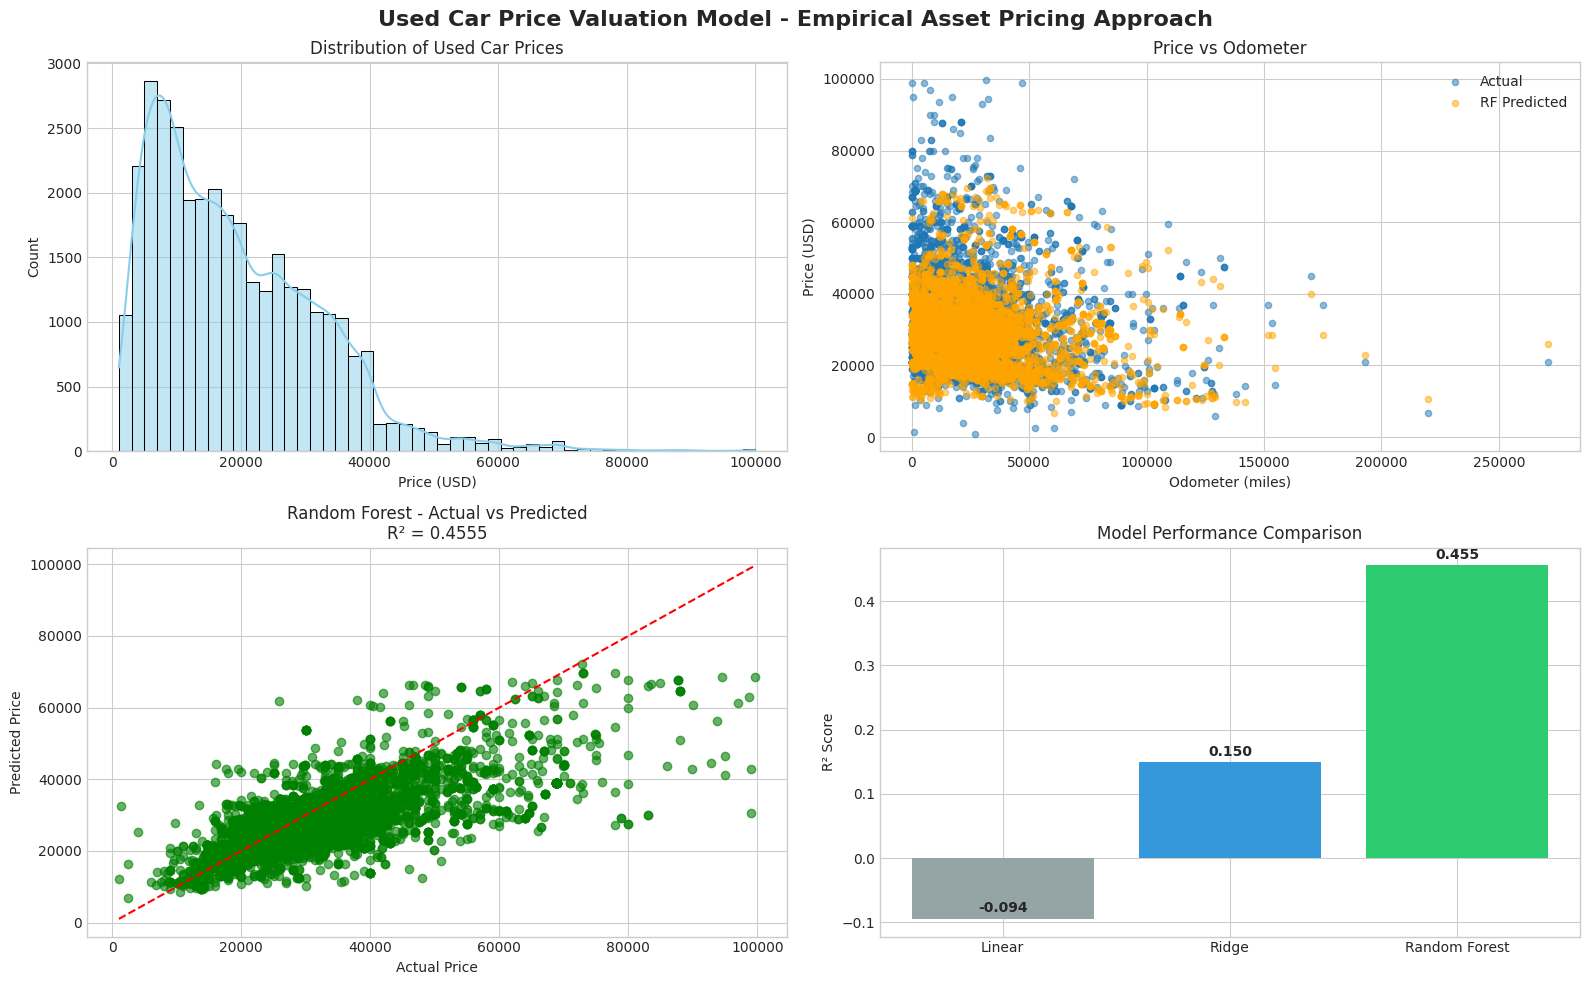


Project 2 complete
Demonstrates linear and non-linear asset valuation techniques


In [15]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price (USD)')

plt.subplot(2, 2, 2)
plt.scatter(test['odometer'], y_test, alpha=0.5, s=20, label='Actual')
plt.scatter(test['odometer'], models['Random Forest']['pred'], alpha=0.5, color='orange', s=20, label='RF Predicted')
plt.title('Price vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price (USD)')
plt.legend()

plt.subplot(2, 2, 3)
best_pred = models['Random Forest']['pred']
plt.scatter(y_test, best_pred, alpha=0.6, color='green')
min_val = min(y_test.min(), best_pred.min())
max_val = max(y_test.max(), best_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red')
plt.title(f'Random Forest - Actual vs Predicted\nR² = {models["Random Forest"]["r2"]:.4f}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(2, 2, 4)
model_names = list(models.keys())
r2_scores = [m['r2'] for m in models.values()]
plt.bar(model_names, r2_scores, color=['#95a5a6', '#3498db', '#2ecc71'])
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', weight='bold')

plt.suptitle('Used Car Price Valuation Model - Empirical Asset Pricing Approach', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

print("\nProject 2 complete")
print("Demonstrates linear and non-linear asset valuation techniques")